In [1]:
from matplotlib import rc
# rc('text', usetex=True)

import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('random-mstp-full-graph.csv').set_index('Size')
df = df.drop(labels=['30 x 3', '75 x 7']) # drop too small caese 
aggregated_data = df.to_numpy()

In [3]:
df

,ScheduleNet,ORTools,FI,NI,NN,RI
Size,,,,,,
50 x 5,1,0.880,1.150,1.064,1.104,1.094
100 x 10,1,0.926,1.137,1.074,1.111,1.102
150 x (10-15),1,0.953,1.163,1.106,1.126,1.117
200 x (20-30),1,1.073,1.075,1.038,1.042,1.051
250 x (15-25),1,1.210,1.129,1.074,1.096,1.092
300 x (20-30),1,2.095,1.117,1.085,1.093,1.086
350 x (20-30),1,2.223,1.148,1.092,1.110,1.103
400 x (20-30),1,3.041,1.158,1.106,1.120,1.106


In [5]:
# df_std = pd.read_csv('random-mstp-full-graph-std.csv').set_index('Size')
# df_std = df_std.drop(labels=['30 x 3', '75 x 7']) # drop too small caese 

In [8]:
def convert2latex(mapsize_string):    
    return 'r'+ mapsize_string.replace('x', '\times')

In [9]:
def annotate_label(bar, value, size):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

In [10]:
algos = ['ScheduleNet', 'OR-tools', 'FI', 'NI', 'NN', 'RI']
sizes = [convert2latex(mapsize) for mapsize in df.index]
sizes_latex = df.index.to_list()

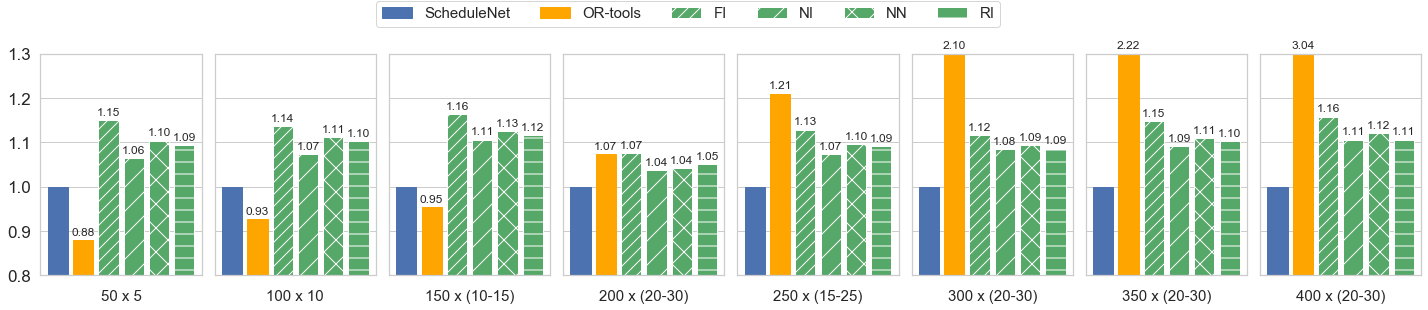

In [12]:
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

norm = True
alpha = 1.0
bar_width = 0.15
colors = ['b','orange','g','g','g','g']
hatchs = [None, None ,'//', '/', 'x', '-']

cutoff_val = 1.3
cutoff_outlier = True
y_min = 0.8

x_label_size = 15
y_label_size = 17
annote_size = 12

fig, axes = plt.subplots(1,len(sizes_latex), figsize=(20,4), sharey=True)
for i, (size, ax) in enumerate(zip(sizes_latex, axes)):
    if norm:
        viz_data = aggregated_data[i, :] / aggregated_data[i, 0]
        or_tools_perf = viz_data[1]
        perfs = viz_data
        if cutoff_outlier:
            viz_data = viz_data.clip(0.0, cutoff_val)
    else:
        viz_data = aggregated_data[i, :]
    
    bar_list = ax.bar(np.arange(len(algos)) + bar_width, viz_data,
                      alpha=alpha, color='g')
    ax.set_xlabel(size, size=x_label_size)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_size) 
    ax.grid(axis='x')
#     ax.grid('off')
    ax.set_xticklabels([])
    ax.set_ylim(y_min, cutoff_val)
    
    if i >=0:
        
#         annotate_label(bar_list[1], or_tools_perf, annote_size)
        for bar, perf in zip(bar_list[1:], perfs[1:]):
            annotate_label(bar, perf, annote_size)

    for ii, c in enumerate(colors):
        if ii >= 2:
            bar_list[ii].set_hatch(hatchs[ii])
        else:
            bar_list[ii].set_color(c)

fig.legend(bar_list, algos, ncol=len(algos), bbox_to_anchor=(0.7, 1.10), fontsize=15)    
fig.tight_layout()